<h3>Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

<h3>Reading the data</h3>

In [2]:
data=pd.read_csv('./Student_Performance.csv')

data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<h3>Exploring the data</h3>

In [3]:
data.shape

(10000, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
data['Extracurricular Activities'].describe()

count     10000
unique        2
top          No
freq       5052
Name: Extracurricular Activities, dtype: object

<h4>Handling null values & duplicates</h4>

In [7]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
data.duplicated().sum()

127

<h4>As the data consists of duplicates, we will remove the duplicates from the data</h4>

In [9]:
data.drop_duplicates(inplace=True,ignore_index=False)

In [10]:
data.duplicated().sum()

0

In [11]:
plt.style.use('ggplot')

<h3>Understanding data through Visualization.</h3>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


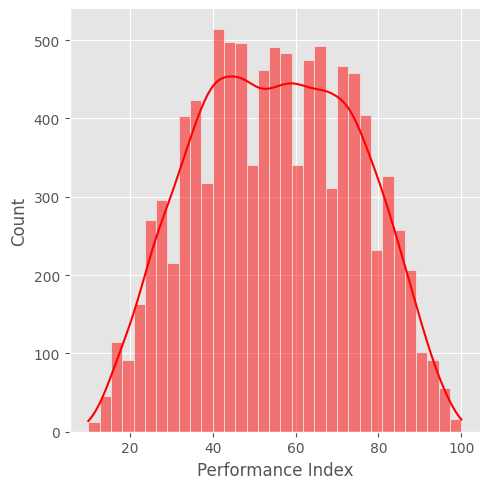

In [12]:
sns.displot(x='Performance Index',data=data,kde=True,color='red');

<b style='font-size:18px'>From the above Histogram, students Performance Index is mosltly 40-60 percent.</b>

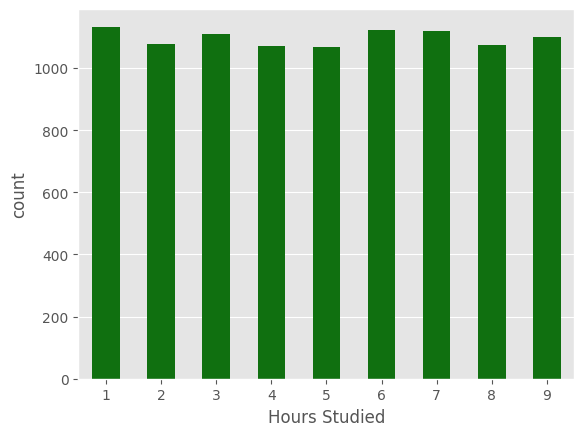

In [13]:
sns.countplot(x='Hours Studied',data=data,color='green',width=0.5);

<b style='font-size:18px'>The count of no.of hours studied by studies are almost same.</b>

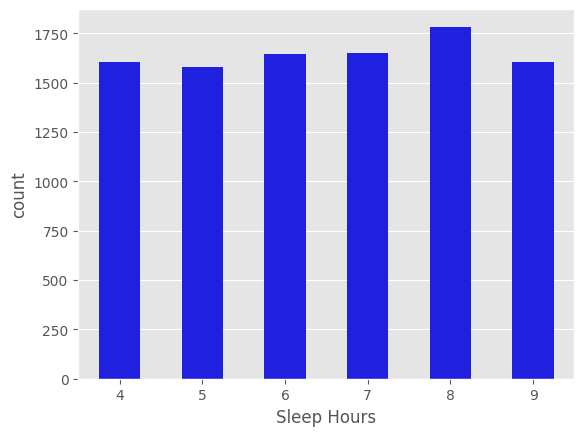

In [14]:
sns.countplot(x='Sleep Hours',data=data,color='blue',width=0.5);

<b style='font-size:18px'>The above graph shows a peek around 8 hours of sleep, suggesting that this may be the most common sleep duration.</b>

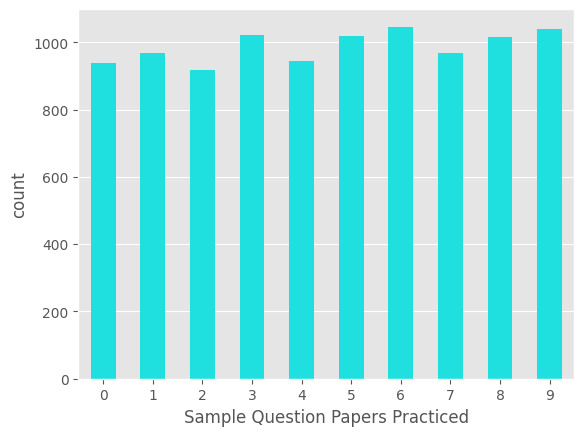

In [15]:
sns.countplot(x='Sample Question Papers Practiced',data=data,color='cyan',width=0.5);

<b style='font-size:18px'>The above graph shows a peak around 6 Sample Question Papers practiced.</b>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


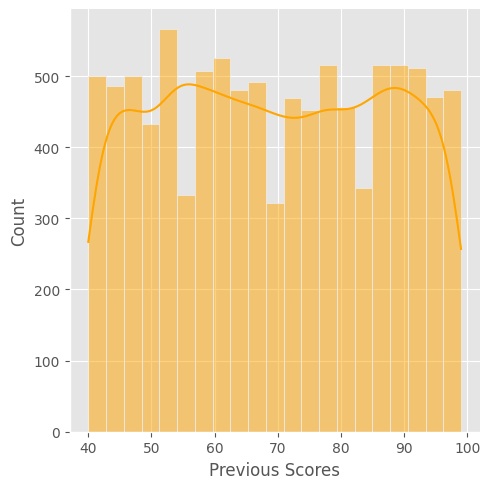

In [16]:
sns.displot(x='Previous Scores',data=data,color='orange',kde=True);

<b style='font-size:18px'>The histogram suggests that most of the students got Previous Scores in between 50-60.</b>

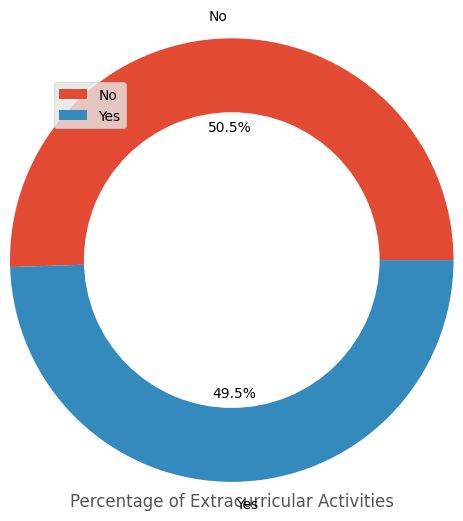

In [17]:
data.groupby('Extracurricular Activities').size().plot(kind='pie',autopct='%0.1f%%',radius=1.5)
plt.pie([1],colors='white',radius=1)
plt.xlabel('\n\nPercentage of Extracurricular Activities')
plt.legend(loc=2);

<b style='font-size:18px'>From the above Pie Chart, 50.5% of the students were not active in the Extracurricular Activities and the remaining 49.5% are active.</b>

<b style='font-size:18px'>Let's find the probability of students who engages in Extracurricular Activities with respect to Performance Score.</b>

In [18]:
performance=[25,50,75,100]
probability=[]

for i in range(len(performance)):
    activity_yes=(data['Extracurricular Activities']=='Yes')
    
    if (i!=0):
        score=(data['Performance Index']<performance[i]) & (data['Performance Index']>performance[i-1])
    
    else:
        score=(data['Performance Index']<performance[i])

    probability.append((activity_yes & score).sum()/len(data))

In [19]:
proba_with_yes=pd.DataFrame(probability,index=['<25','25-50','50-75','75-100'])

proba_with_yes.rename({0:'Extra Activities'},axis=1,inplace=True)

In [20]:
performance=[25,50,75,100]
probability_no=[]

for i in range(len(performance)):
    activity_no=(data['Extracurricular Activities']=='No')
    
    if (i!=0):
        score=(data['Performance Index']<performance[i]) & (data['Performance Index']>performance[i-1])
    
    else:
        score=(data['Performance Index']<performance[i])

    probability_no.append((activity_no & score).sum()/len(data))

In [21]:
proba_with_no=pd.DataFrame(probability_no,index=['<25','25-50','50-75','75-100'])

proba_with_no.rename({0:'No Extra Activities'},axis=1,inplace=True)

In [22]:
probabilities=pd.concat([proba_with_yes,proba_with_no],axis=1)

probabilities.index.name='Performance Index'

probabilities

,Extra Activities,No Extra Activities
Performance Index,,
<25,0.022486,0.029373
25-50,0.172693,0.176036
50-75,0.191938,0.197610
75-100,0.088322,0.082751


<b style='font-size:18px'>From the above data frame, it is almost similar that there is no significant difference between probabilities of participating and not participating in Extracurricular activities.</b>

<h4><b>Correlation between attributes</b></h4>

In [23]:
data.corr(numeric_only=True)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.007975,0.008719,0.915135
Sleep Hours,0.002131,0.007975,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.050352,0.043436,1.000000


<b style='font-size:18px'>From the above data frame, the correlation between Previous Scores and Performance Index is highly positive, indicating that increasing in Previous Scores increases the Performance Index</b>

<b style='font-size:18px'>Also, the correlation between Hours Studied and Previous Scores is highly negative, indicating that increasing in Previous Scores results in decreasing in no. of hours studies.</b>

<b style='font-size:18px'>The above results are visualized through a scatter plot.</b>

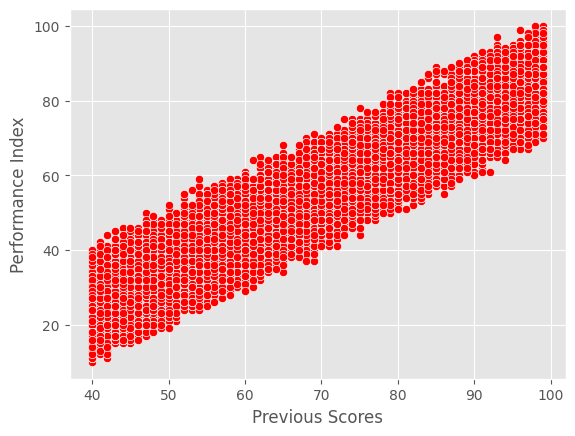

In [24]:
sns.scatterplot(x='Previous Scores',y='Performance Index',data=data,color='red');

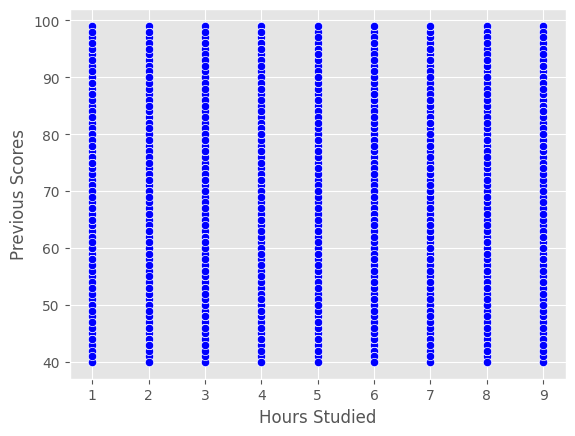

In [25]:
sns.scatterplot(y='Previous Scores',x='Hours Studied',data=data,color='blue');

<b style='font-size:18px'>The below pair plot shows the relation between different attributes.</b>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

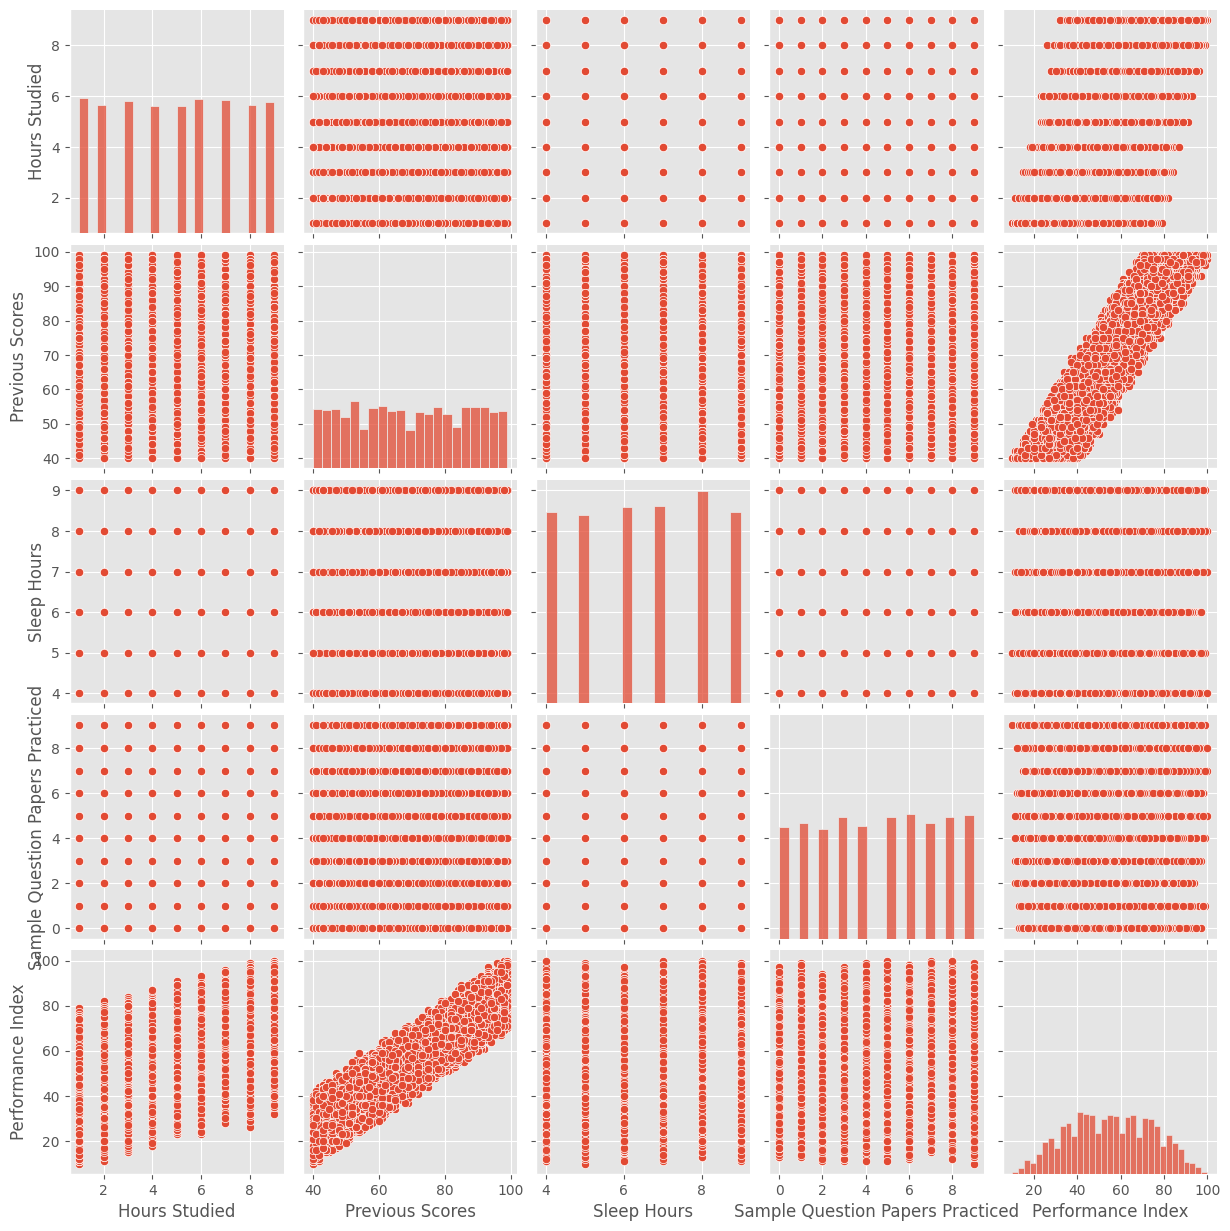

In [26]:
sns.pairplot(data);

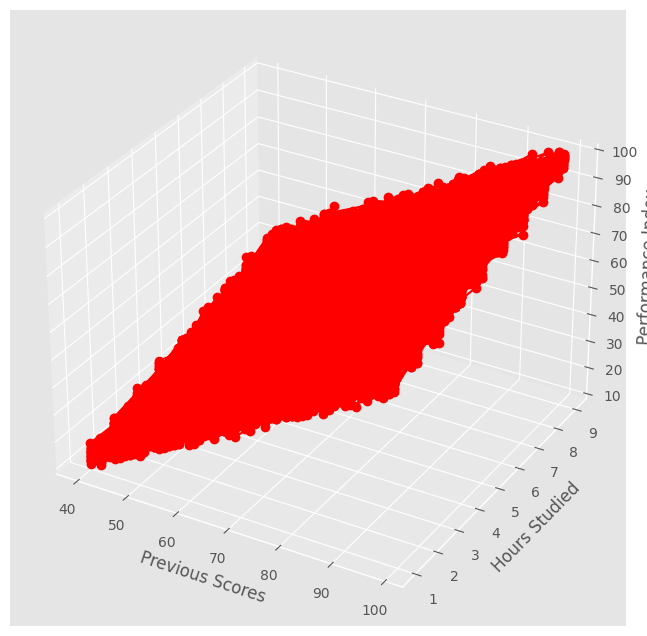

In [27]:
fig=plt.figure(figsize=(8,8))
ax=plt.axes(111,projection='3d')

ax.plot(xs=data['Previous Scores'],ys=data['Hours Studied'],zs=data['Performance Index'],c='r',marker='o')
ax.set_xlabel('Previous Scores')
ax.set_ylabel('Hours Studied')
ax.set_zlabel('Performance Index');

<h3>Data Preprocessing</h3>

<b style='font-size:18px'>As the Machine Learning model only accepts integer values, we label the Extracurricular Activities showing 'Yes' or 'No' to 1 or 0. This is a stage in data preprocessing.</b>

In [28]:
le=LabelEncoder()

data.iloc[:,2]=le.fit_transform(data.iloc[:,2])

In [29]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


<b style='font-size:18px'>Drop the dependent variable from the data and assign it to a new variable. Also assign the dependent variable to a new variable.</b>

In [30]:
X=data.drop('Performance Index',axis=1).values
y=data['Performance Index'].values

In [31]:
X

array([[7, 99, 1, 9, 1],
       [4, 82, 0, 4, 2],
       [8, 51, 1, 7, 2],
       ...,
       [6, 83, 1, 8, 5],
       [9, 97, 1, 7, 0],
       [7, 74, 0, 8, 1]], dtype=object)

In [32]:
y

array([91., 65., 45., ..., 74., 95., 64.])

<b style='font-size:18px'>Split the dependent and independent variables into a training and testing dataset.Fit the training data to the Regression model and predict the values of testing data.</b>

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,random_state=6,train_size=0.75,test_size=0.25)

<b style='font-size:18px'>Training a model using Multiple Regression.</b>

In [34]:
regressor=LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred=regressor.predict(X_test)

y_pred

array([33.87135817, 65.58040505, 21.36663654, ..., 45.76969615,
       67.36052676, 46.20522922])

<b style='font-size:18px'>Comparing the predicted values with the original values of testing data.</b>

In [36]:
np.concatenate((y_test.reshape(-1,1),y_pred.reshape(-1,1)),axis=1)

array([[35.        , 33.87135817],
       [67.        , 65.58040505],
       [19.        , 21.36663654],
       ...,
       [43.        , 45.76969615],
       [67.        , 67.36052676],
       [47.        , 46.20522922]])

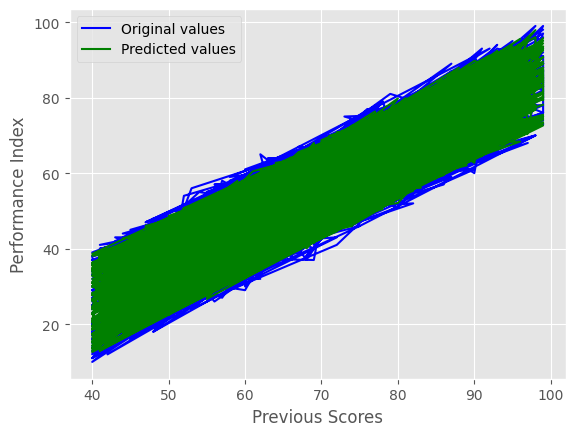

In [37]:
plt.plot(X_test[:,1],y_test,label='Original values',color='blue')
plt.plot(X_test[:,1],y_pred,label='Predicted values',color='green')

plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.legend();

<b style='font-size:18px'>From the graph, the predicted values almost fits to the original values. We conclude that the predictions predicted by the model is highly accurate.</b>

<b style='font-size:18px'>Let's calculate the metrics of model</b>

In [38]:
r2_score(y_test,y_pred)

0.9889477154575314

<b style='font-size:18px'>0.988 suggests that predicts done by the model is 98% accurate.</b>